In [1]:
import numpy as np 
import pandas as pd
df = pd.read_csv('creditcard.csv')
#data is hihly imbalanced and the columns have numerical names, 
#no understanding of what columns stands for what. How to do feature selection?

In [2]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

/Users/sameerakodi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sameerakodi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sameerakodi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sameerakodi/opt/anaconda3/lib/python3.7/site-

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Amount'].mean()

88.34961925093133

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df['Class'].value_counts(normalize = True)*100
#highly imbalanced data with positives(fraud) only 0.17% of the whole data

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().sum().max()
#shows that no null values present 

0

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
df.shape

(284807, 31)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Fraud vs No Fraud')

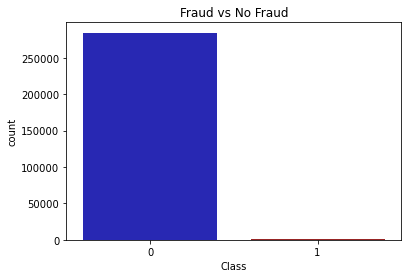

In [12]:
colors = ["#1111CA", "#AA1111"]
sns.countplot(x = 'Class', data =df,palette = colors)
plt.title("Fraud vs No Fraud")


In [13]:
df['Amount'].values

array([149.62,   2.69, 378.66, ...,  67.88,  10.  , 217.  ])

Text(0.5, 1.0, 'Transaction Dist')

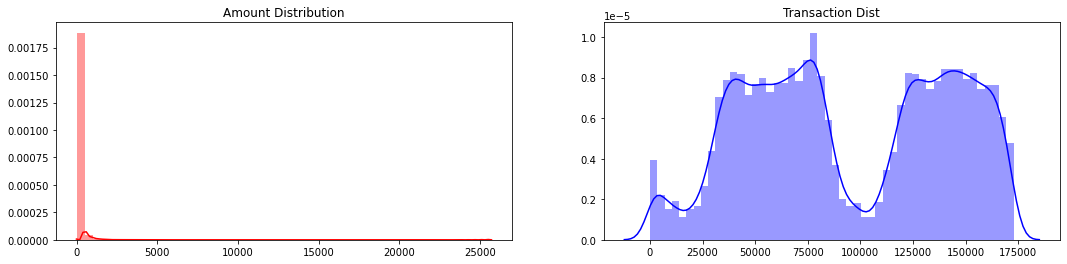

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.distplot(df['Amount'].values,ax = ax[0],color = 'r')
sns.distplot(df['Time'].values,ax = ax[1], color = 'b')
ax[0].set_title("Amount Distribution")
ax[1].set_title("Transaction Dist")

In [15]:
#first scale time and amount into 
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Amount','Time'],axis = 1, inplace = True)

scaled_time = df['scaled_time']
scaled_amount = df['scaled_amount']
df = df.drop(['scaled_time','scaled_amount'],axis = 1)
df.insert(0,'scaled_time',scaled_time)
df.insert(0,'scaled_amount',scaled_amount)
df.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [16]:
##since the data is highly imbalanced : we have to sub sample our data to get a sample with equal amounts of faraud and non fraud cases
#split the data into test and train set before sampling because we finally want to test our model on the original data

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

X = df.drop(['Class'],axis = 1)
y = df['Class']

sss= StratifiedKFold(n_splits = 5,random_state = None, shuffle = False)

for train_index,test_index in sss.split(X,y):
    print("Train:", train_index,test_index,"Test: ", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
    
#distribution of class in both test and train datasets should be the same as original
original_ytest.value_counts(normalize = True)*100
original_ytrain.value_counts(normalize = True)*100    



original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

Train: [ 30473  30496  31002 ... 284804 284805 284806] [    0     1     2 ... 57017 57018 57019] Test:  [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] [ 30473  30496  31002 ... 113964 113965 113966] Test:  [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] [ 81609  82400  83053 ... 170946 170947 170948] Test:  [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] [150654 150660 150661 ... 227866 227867 227868] Test:  [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] [212516 212644 213092 ... 284804 284805 284806] Test:  [212516 212644 213092 ... 284804 284805 284806]


In [17]:
#Random Under Sampling 
#to avoid overfitting , we sample out data in such a way that it is more balanced
df['Class'].value_counts()[1]


492

In [18]:
df = df.sample(frac = 1)
fraud_df = df.loc[df['Class'] ==1]
non_fraud_df = df.loc[df['Class'] == 0][: 492]
#df['Class'].value_counts()[1] = 492


In [19]:
equally_distributed_df = pd.concat([fraud_df,non_fraud_df])

In [20]:
equally_distributed_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
120837,1.088521,-0.102374,-5.140723,3.568751,-5.896245,4.164720,-4.091193,-1.989960,-5.472436,2.422821,...,0.318995,1.131130,0.118022,-0.332704,0.139941,0.324758,-0.180769,0.177810,0.661555,1
172787,1.713407,0.429352,-2.628922,2.275636,-3.745369,1.226948,-1.132966,-1.256353,-1.752420,0.281736,...,0.133106,0.870730,1.269473,-0.265494,-0.480549,0.169665,0.096081,0.070036,0.063768,1
10897,-0.293440,-0.775409,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,...,1.111502,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1
249828,-0.213233,0.821285,0.667714,3.041502,-5.845112,5.967587,0.213863,-1.462923,-2.688761,0.677764,...,0.558425,0.329760,-0.941383,-0.006075,-0.958925,0.239298,-0.067356,0.821048,0.426175,1
74496,-0.295815,-0.341616,-7.347955,2.397041,-7.572356,5.177819,-2.854838,-1.795239,-8.783235,0.437157,...,0.073164,-0.175273,0.543325,-0.547955,-0.503722,-0.310933,-0.163986,1.197895,0.378187,1


In [21]:
#shuffle dataframe rows (random state  and . sample does it)
new_df = equally_distributed_df.sample(frac = 1, random_state = 42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
220981,1.606931,0.677745,-0.268190,0.167632,0.311829,0.481760,0.506859,1.776055,-0.469470,-0.318541,...,-0.262243,0.432809,-0.826274,-0.480483,-1.638216,1.289404,-0.162088,0.207676,0.203213,0
6329,-0.293440,-0.906648,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1
109203,-0.135401,-0.157709,1.246518,-0.001949,0.445746,0.777030,-0.393519,-0.290429,-0.131949,-0.085819,...,-0.068392,-0.133283,-0.128550,-0.140928,-0.046007,0.628740,0.440227,-0.012610,0.008979,0
251881,-0.263537,0.832364,1.868226,1.363077,-1.994934,4.173516,1.239751,-0.746186,0.572731,-0.131235,...,-0.172216,-0.301001,-0.818972,0.206812,-0.263683,-0.114958,-0.240672,-0.006629,0.017258,1
15451,1.089779,-0.679742,-20.532751,12.373989,-23.009003,6.144821,-15.587296,-4.384491,-15.939003,13.696416,...,1.592754,1.754608,-1.466115,-0.856779,0.125777,1.402587,-0.223755,1.574249,0.469201,1


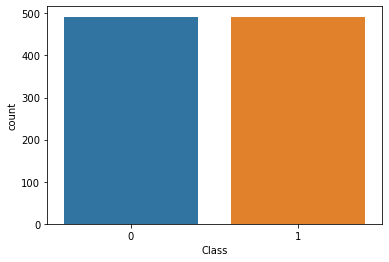

In [22]:
sns.countplot(x = 'Class',data = new_df)
#this shows that the class column is equally divided between fraud and no fraud

In [23]:
new_df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
220981,1.606931,0.677745,-0.268190,0.167632,0.311829,0.481760,0.506859,1.776055,-0.469470,-0.318541,...,-0.262243,0.432809,-0.826274,-0.480483,-1.638216,1.289404,-0.162088,0.207676,0.203213,0
6329,-0.293440,-0.906648,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1
109203,-0.135401,-0.157709,1.246518,-0.001949,0.445746,0.777030,-0.393519,-0.290429,-0.131949,-0.085819,...,-0.068392,-0.133283,-0.128550,-0.140928,-0.046007,0.628740,0.440227,-0.012610,0.008979,0
251881,-0.263537,0.832364,1.868226,1.363077,-1.994934,4.173516,1.239751,-0.746186,0.572731,-0.131235,...,-0.172216,-0.301001,-0.818972,0.206812,-0.263683,-0.114958,-0.240672,-0.006629,0.017258,1
15451,1.089779,-0.679742,-20.532751,12.373989,-23.009003,6.144821,-15.587296,-4.384491,-15.939003,13.696416,...,1.592754,1.754608,-1.466115,-0.856779,0.125777,1.402587,-0.223755,1.574249,0.469201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141260,6.850416,-0.005733,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,...,2.172709,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,1
141259,6.850416,-0.005733,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,...,2.172709,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,1
243224,-0.307413,0.788954,2.161610,0.198279,-2.536953,0.413367,0.903409,-1.406622,0.921913,-0.542788,...,-0.283276,0.247206,0.842037,-0.140362,0.813159,0.682784,0.692679,-0.133198,-0.088610,0
192529,-0.293440,0.529247,-1.396204,2.618584,-6.036770,3.552454,1.030091,-2.950358,-1.528506,0.189319,...,0.031795,0.143177,-0.390176,0.356029,-0.762352,0.096510,-0.487861,0.062655,-0.240732,1


## Correlation

<function matplotlib.pyplot.show(*args, **kw)>

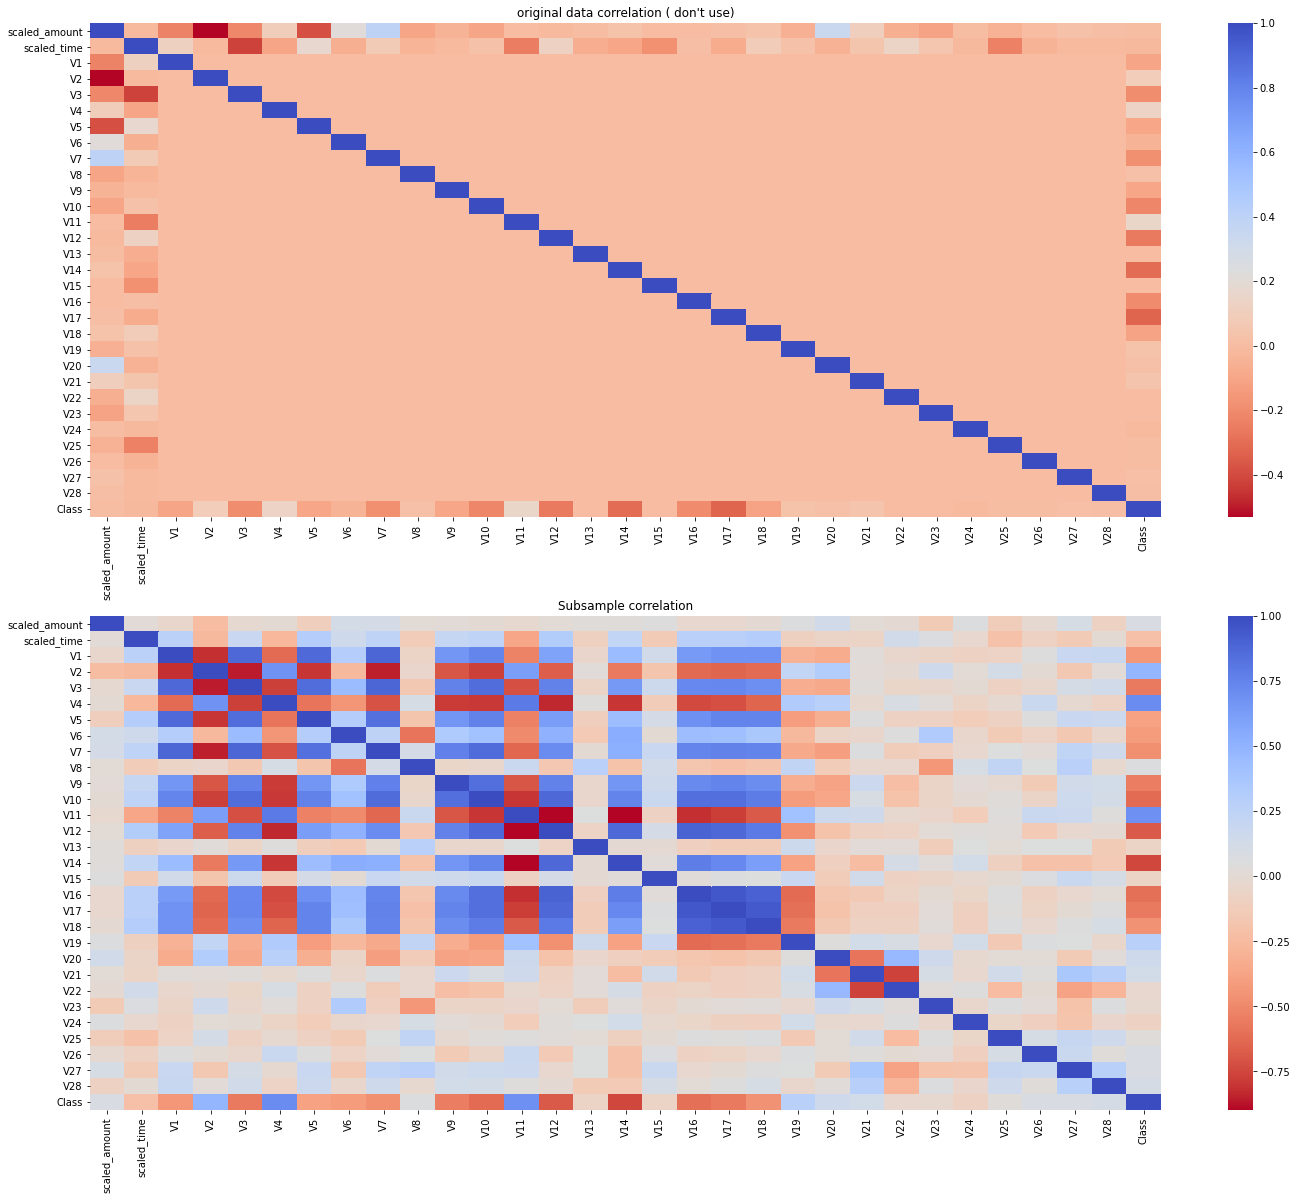

In [24]:
f, (ax1,ax2) = plt.subplots(2,1, figsize=(24,20))
original_corr = df.corr()
sub_sample_corr = new_df.corr()
sns.heatmap(original_corr,cmap = 'coolwarm_r',annot_kws={'size':20},ax = ax1)
sns.heatmap(sub_sample_corr,cmap = 'coolwarm_r',annot_kws={'size':20},ax = ax2)
ax1.set_title("original data correlation ( don't use)")
ax2.set_title("Subsample correlation")
plt.show

#the first plot is giving a highly imbalanced view
#the second plot gives the right picture

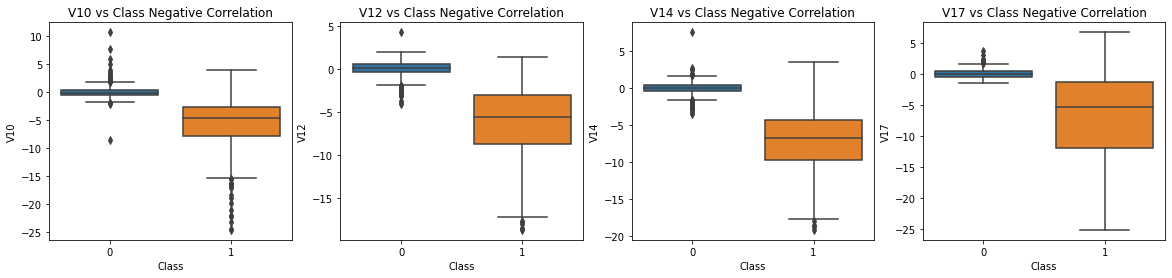

In [25]:
f, axes = plt.subplots(ncols = 4, figsize =(20,4))
sns.boxplot(x = 'Class', y = 'V10', data = new_df, ax = axes[0])
axes[0].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x = 'Class', y = 'V12', data = new_df, ax = axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x = 'Class', y = 'V14', data = new_df, ax = axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x = 'Class', y = 'V17', data = new_df, ax = axes[3])
axes[3].set_title('V17 vs Class Negative Correlation')

plt.show()

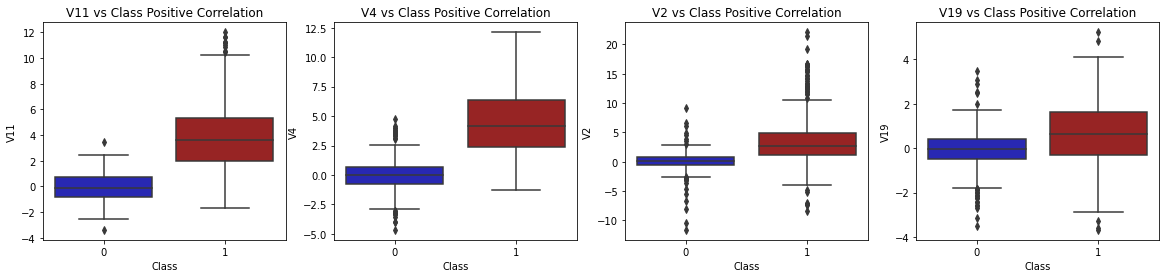

In [26]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

## Anomaly Detection

Text(0.5, 1.0, 'V10 Distribution \n (Fraud Transactions)')

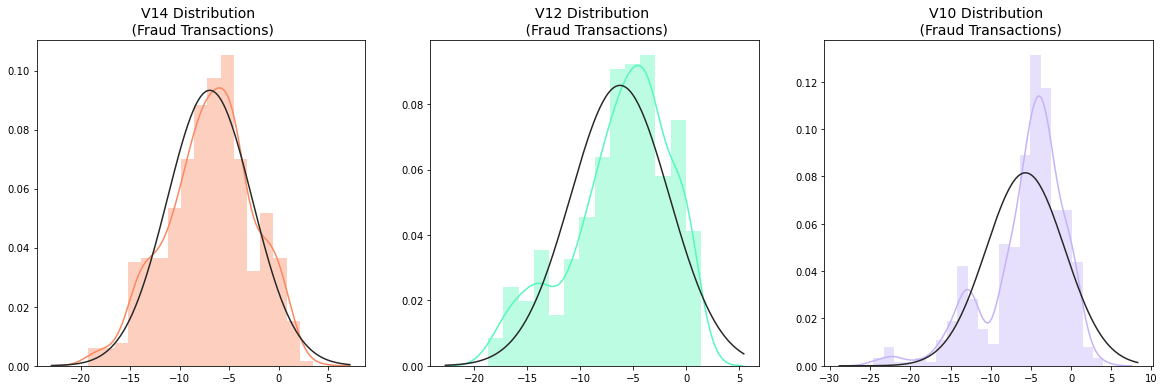

In [27]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax = ax1,fit = norm,color = '#FB8861')
sns.distplot(v12_fraud_dist,ax = ax2,fit = norm,color = '#56F9BB')
sns.distplot(v10_fraud_dist,ax = ax3,fit = norm, color = '#C5B3F9')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

In [28]:
#v14 outliers

v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
v14_25 = np.percentile(v14_fraud,25)
v14_75 = np.percentile(v14_fraud,75)
v14_interquartile = v14_75 - v14_25
print(v14_interquartile)
v14_cutoff = v14_interquartile*1.5
v14_lower, v14_upper = v14_25 - v14_cutoff, v14_75 + v14_cutoff
print(v14_lower, v14_upper)
outliers = [x for x in v14_fraud_dist if x < v14_lower or x > v14_upper ]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))
new_df = new_df.drop(new_df[(new_df['V14'] < v14_lower) | (new_df['V14'] > v14_upper)].index)
print('-'*70)


#v12 outliers

v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
v12_25 = np.percentile(v12_fraud,25)
v12_75 = np.percentile(v12_fraud,75)
v12_interquartile = v12_75 - v12_25
print(v12_interquartile)
v12_cutoff = v12_interquartile*1.5
v12_lower, v12_upper = v12_25 - v12_cutoff, v12_75 + v12_cutoff
print(v12_lower, v12_upper)
outliers = [x for x in v12_fraud_dist if x < v12_lower or x > v12_upper ]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V12 outliers:{}'.format(outliers))
new_df = new_df.drop(new_df[(new_df['V12'] < v12_lower) | (new_df['V12'] > v12_upper)].index)
print('-'*70)


#v10 outliers


v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
v10_25 = np.percentile(v10_fraud,25)
v10_75 = np.percentile(v10_fraud,75)
v10_interquartile = v10_75 - v10_25
print(v10_interquartile)
v10_cutoff = v10_interquartile*1.5
v10_lower, v10_upper = v10_25 - v10_cutoff, v10_75 + v10_cutoff
print(v10_lower, v10_upper)
outliers = [x for x in v10_fraud_dist if x < v10_lower or x > v10_upper ]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))
new_df = new_df.drop(new_df[(new_df['V10'] < v10_lower) | (new_df['V10'] > v10_upper)].index)
print('-'*70)


5.409902115485519
-17.807576138200663 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-19.2143254902614, -18.4937733551053, -18.8220867423816, -18.049997689859396]
----------------------------------------------------------------------
5.780002635714835
-17.3430371579634 5.776973384895937
Feature V12 Outliers for Fraud Cases: 6
V12 outliers:[-17.7691434633638, -17.631606313870698, -18.683714633344298, -18.047596570821604, -18.553697009645802, -18.4311310279993]
----------------------------------------------------------------------
4.954797397665596
-14.89885463232024 4.920334958342141
Feature V10 Outliers for Fraud Cases: 27
V10 outliers:[-14.9246547735487, -15.124162814494698, -15.2399619587112, -16.7460441053944, -16.3035376590131, -19.836148851696, -18.9132433348732, -15.2318333653018, -18.2711681738888, -16.2556117491401, -14.9246547735487, -22.1870885620007, -16.6496281595399, -22.1870885620007, -23.2282548357516, -15.563791338730098, -15.563791338730098, -

Text(0.5, 1.0, 'V10 outliers')

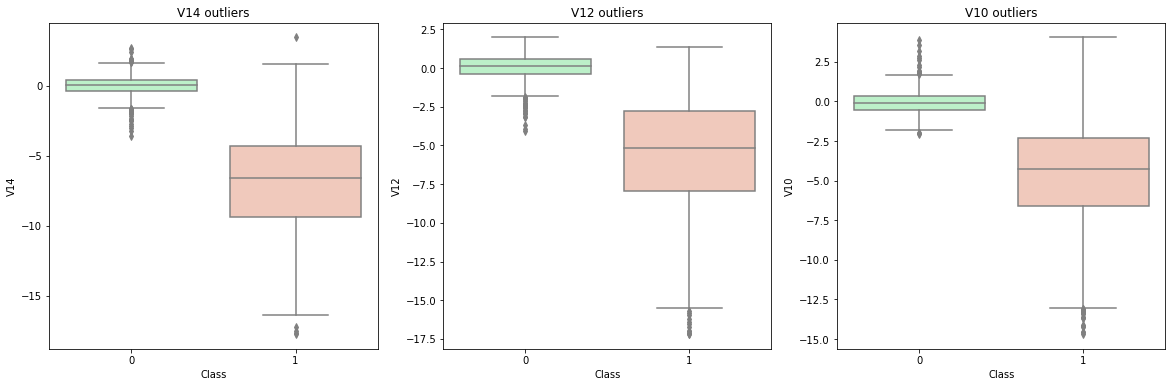

In [29]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
colors = ['#B3F9C5', '#f9c5b3']
sns.boxplot(x ='Class', y ='V14', data = new_df,ax = ax1, palette = colors)
ax1.set_title("V14 outliers")
sns.boxplot(x ='Class', y ='V12', data = new_df, ax = ax2, palette = colors)
ax2.set_title("V12 outliers")
sns.boxplot(x ='Class', y ='V10', data = new_df,ax = ax3, palette = colors)
ax3.set_title("V10 outliers")

## Dimensionality Reduction  and Clustering 

### Dimensionality Reduction 

In [30]:
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

In [31]:
%%time
#T-SNE Implementation
X_reduced_tsne = TSNE(n_components = 2, random_state = 42).fit_transform(X.values)

CPU times: user 28.7 s, sys: 570 ms, total: 29.3 s
Wall time: 7.83 s


In [32]:
%%time
#PCA implementaiton
X_reduced_pca = PCA(n_components = 2, random_state = 42).fit_transform(X.values)

CPU times: user 107 ms, sys: 11.9 ms, total: 118 ms
Wall time: 39.3 ms


In [33]:
%%time
#TruncatedSVD implementation
X_reduced_SVD = TruncatedSVD(n_components = 2, algorithm = 'randomized', random_state = 42).fit_transform(X.values)

CPU times: user 13 ms, sys: 2.36 ms, total: 15.4 ms
Wall time: 6.06 ms


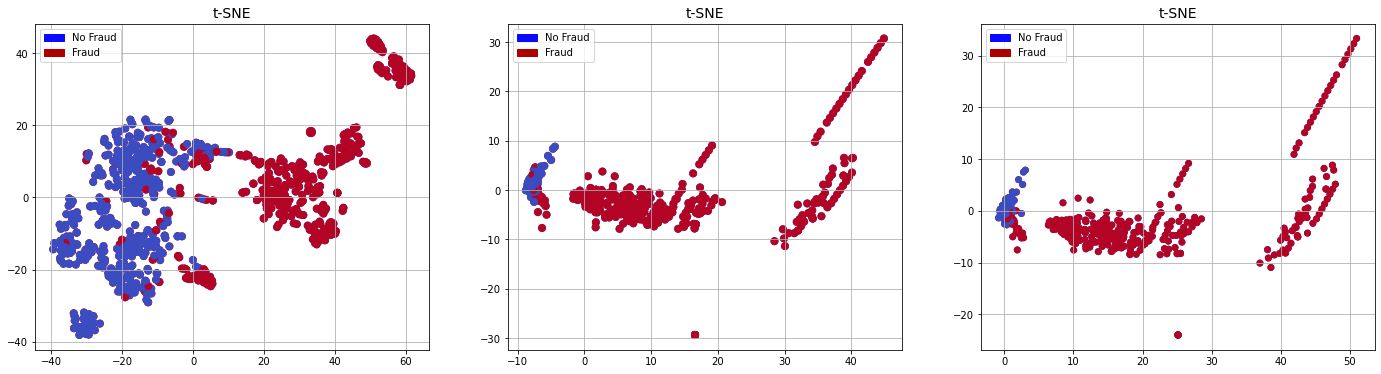

In [34]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

##tsne plot

ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

##pca plot 

ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('t-SNE', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

## truncated SVD plot

ax3.scatter(X_reduced_SVD[:,0], X_reduced_SVD[:,1], c = (y==0), cmap = 'coolwarm', label = 'No Fraud')
ax3.scatter(X_reduced_SVD[:,0], X_reduced_SVD[:,1], c = (y==1), cmap = 'coolwarm', label = 'No Fraud')
ax3.set_title('t-SNE', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

## Classification

In [35]:
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [37]:
classifiers = {"LogisticRegression" : LogisticRegression(),
              "KNearest" : KNeighborsClassifier(),
              "SVM" : SVC(),
              "DecisionTreeClassifier": DecisionTreeClassifier()}

In [38]:
# normal test train split classification

for key,clf in classifiers.items():
    clf.fit(X_train,y_train)
    y_predicted = clf.predict(X_test)
    acc = accuracy_score(y_test, y_predicted)
    print(clf,acc)

LogisticRegression() 0.9682539682539683
KNeighborsClassifier() 0.9576719576719577
SVC() 0.9629629629629629
DecisionTreeClassifier() 0.9206349206349206


In [39]:
#with cross validation 

from sklearn.model_selection import cross_val_score

for key,clf in classifiers.items():
    clf.fit(X_train,y_train)
    training_score = cross_val_score(clf,X_train,y_train,cv =5)
    acc = training_score.mean()*100
    print(clf,acc)

LogisticRegression() 93.24503311258277
KNeighborsClassifier() 92.98013245033113
SVC() 92.58278145695364
DecisionTreeClassifier() 88.476821192053


#### GridSearchCV 

In [40]:
# Using GridSearchCV to find the features that have high predictive power
from sklearn.model_selection import GridSearchCV

#Logistic Regression

log_reg_params= {"penalty": ['l1','l2'], 'C' :[0.001,.01,0.1,1,10,100,100]}
grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train,y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_


log_reg_score = cross_val_score(log_reg,X_train,y_train,cv = 5)
acc= log_reg_score.mean()*100
print("logistic regression : ", acc)

logistic regression :  93.24503311258277


In [41]:
# K nearest Neighbours

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm' : ['auto','ball_tree','kd_tree','brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train,y_train)
knears_neighbors = grid_knears.best_estimator_


knears_score = cross_val_score(knears_neighbors, X_train,y_train,cv=5)
acc= knears_score.mean()*100
print("k nearest neighbors : ", acc)                          

k nearest neighbors :  92.58278145695364


In [42]:
# SVC

svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(),svc_params)
grid_svc.fit(X_train,y_train)
svc = grid_svc.best_estimator_


svc_score = cross_val_score(svc, X_train,y_train,cv=5)
acc= svc_score.mean()*100
print("SVC : ", acc) 



SVC :  93.24503311258277


In [43]:
#Decision Tree

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_


tree_score = cross_val_score(tree_clf, X_train,y_train,cv=5)
acc= tree_score.mean()*100
print("Decision Tree : ", acc) 

Decision Tree :  92.45033112582782


#### ROC AUC graph

In [44]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score


log_pred = cross_val_predict(log_reg,X_train,y_train,cv = 5)
knears_pred = cross_val_predict(knears_neighbors,X_train,y_train,cv = 5)
svc_pred = cross_val_predict(svc,X_train,y_train,cv = 5)
tree_pred = cross_val_predict(tree_clf,X_train,y_train,cv = 5)

print("Logistic Regression : ", roc_auc_score(y_train,log_pred))
print("K nearest neighbours : ", roc_auc_score(y_train,knears_pred))
print("SVC : ", roc_auc_score(y_train,svc_pred))
print("Decision Tree : ", roc_auc_score(y_train,tree_pred))




Logistic Regression :  0.9321407015426078
K nearest neighbours :  0.9254382886739749
SVC :  0.9320775374422752
Decision Tree :  0.9239398958494168


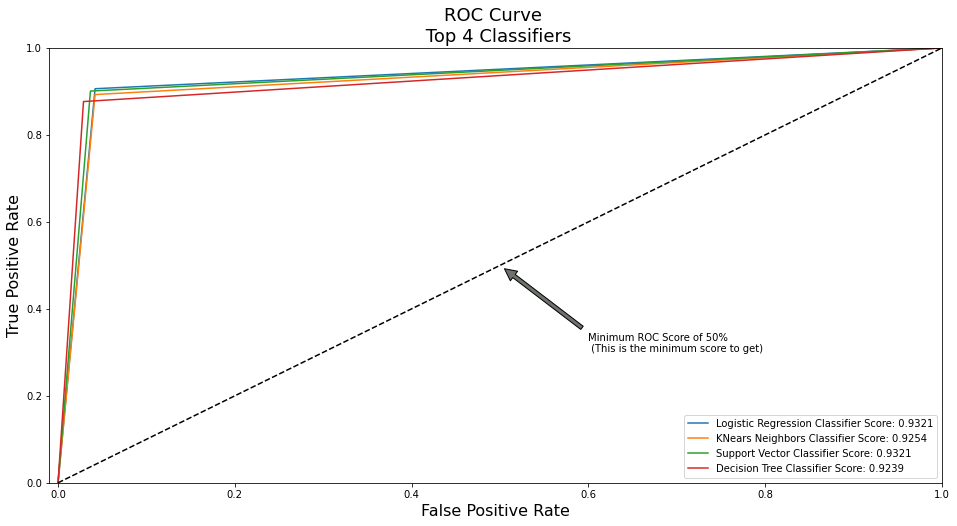

In [45]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_pred)))
plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()


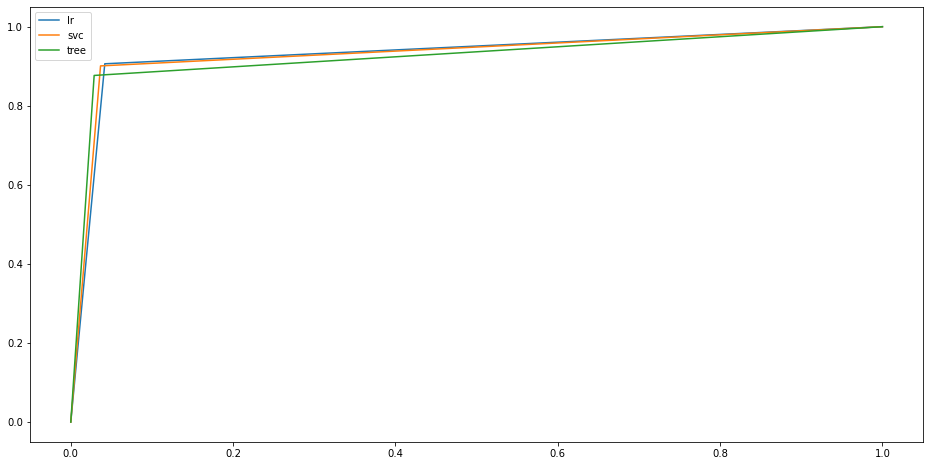

In [46]:
#testing
plt.figure(figsize=(16,8))
plt.plot(log_fpr,log_tpr,label = "lr")
plt.plot(svc_fpr,svc_tpr, label = "svc")
plt.plot(tree_fpr,tree_tpr, label = "tree")
plt.legend()

#### Undersampling

In [47]:
undersample_X = df.drop('Class',axis = 1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X,undersample_y):
    print("Train :", train_index , "Test :", test_index)
    


Train : [ 55890  56963  56964 ... 284804 284805 284806] Test : [    0     1     2 ... 56960 56961 56962]
Train : [     0      1      2 ... 284804 284805 284806] Test : [ 55890  56963  56964 ... 113922 113923 113924]
Train : [     0      1      2 ... 284804 284805 284806] Test : [113905 113925 113926 ... 173921 176538 177413]
Train : [     0      1      2 ... 284804 284805 284806] Test : [170875 170876 170877 ... 230596 232464 232950]
Train : [     0      1      2 ... 230596 232464 232950] Test : [227840 227841 227842 ... 284804 284805 284806]


In [63]:
undersample_Xtrain = undersample_X.iloc[train_index]
undersample_Xtest = undersample_X.iloc[test_index]
undersample_ytrain = undersample_y.iloc[train_index]
undersample_ytest = undersample_y.iloc[test_index]


undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

In [64]:
u_accuracy = []
u_precision = []
u_recall = []
u_f1 = []
u_auc = []

#### Near miss technique

In [65]:
# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)

X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [70]:
# Cross validating the right way

for train, test in sss.split(undersample_Xtrain,undersample_ytrain):
    u_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy = 'majority'), log_reg)

    # SMOTE happens during Cross Validation not before..
    
    u_model = u_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    u_prediction = u_model.predict(undersample_Xtrain[test])
    
    
    u_accuracy.append(u_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    u_precision.append(precision_score(original_ytrain[test], u_prediction))
    u_recall.append(recall_score(original_ytrain[test], u_prediction))
    u_f1.append(f1_score(original_ytrain[test], u_prediction))
    u_auc.append(roc_auc_score(original_ytrain[test], u_prediction))

#### Train and Cross validation scores graphs

In [ ]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

## Deeper dive into Logistic Regression and the confusion matrix

NameError: name 'plot' is not defined

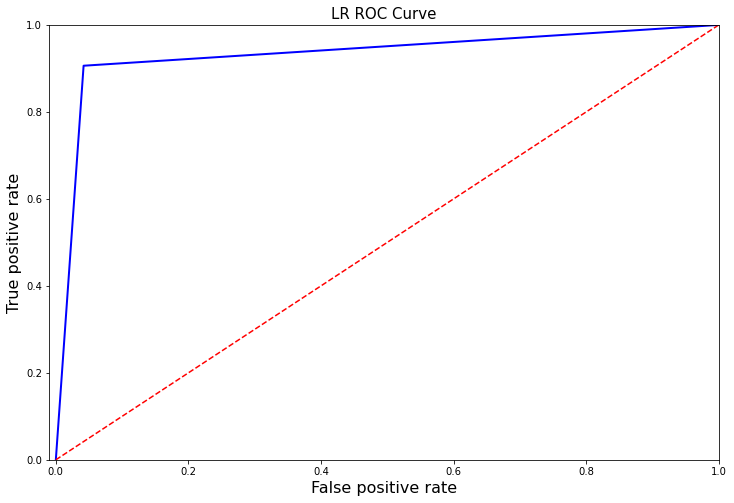

In [62]:
#ROC curve 

def logistic_curve(log_fpr,log_tpr):
    plt.figure(figsize=(12,8))
    plt.title("LR ROC Curve", fontsize = 15)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel("False positive rate",fontsize = 16)
    plt.ylabel("True positive rate", fontsize = 16)
    plt.axis([-0.01,1,0,1])
    
logistic_curve(log_fpr,log_tpr)
plot.show()

In [67]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold = precision_recall_curve(y_train,log_pred)


In [71]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(u_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(u_precision)))
print("Recall Score: {:.2f}".format(np.mean(u_recall)))
print("F1 Score: {:.2f}".format(np.mean(u_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.94
Precision Score: 0.62
F1 Score: 0.75
Accuracy Score: 0.69
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.51
Precision Score: 0.00
Recall Score: 0.44
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [73]:
undersample_y_score = log_reg.decision_function(original_Xtest)


array([13.72273502, 21.42247885, 13.49424965, ..., -0.483541  ,
        5.5993731 ,  4.38030209])

In [74]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.07


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.07')

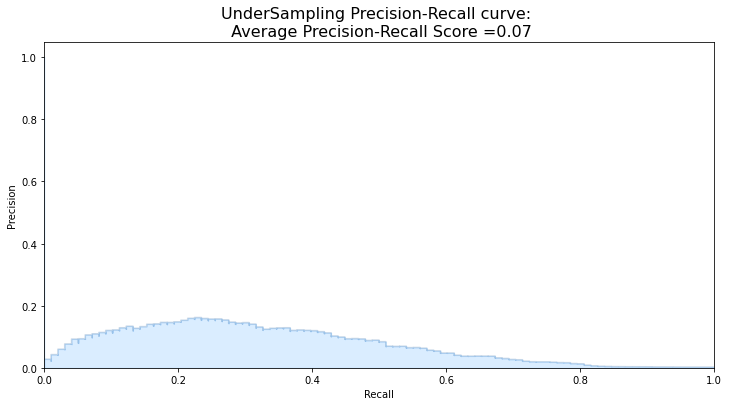

In [75]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

## SMOTE TECHNIQUE

In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [78]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(),log_reg_params,n_iter = 4)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961


In [79]:
# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# for train,test in sss.split(original_Xtrain, original_ytrain):
#     pipeline = imbalances